In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [4]:
%store -r student_courses
student_courses

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
93,2007 Summer,31341,Graduate,Near Eastern Studies,Persian,20,Primary,1,70310,70310.0,Inten Inter Persian,Jaleh Pirnazar,A,Letter Grade,A+,4.0,10.0
94,2007 Summer,33827,Graduate,German,German,10,Primary,1,48655,48655.0,Elem German Wrkshp,Meredith Kolar; Nikolaus Euba,A,Letter Grade,A+,4.0,10.0
95,2007 Summer,169335,Graduate,Near Eastern Studies,Near Eastern Studies,290A,Independent Study,3,66140,66140.0,Special Studies,Hatem Bazian,A,Letter Grade,A+,4.0,4.0
96,2007 Summer,194536,Graduate,Ethnic Studies,Ethnic Studies,135AC,Primary,2,45245,45245.0,U.S. Immigration,Catherine Choy,A,Letter Grade,A+,4.0,4.0
97,2007 Summer,198873,Undergraduate,Near Eastern Studies,Hebrew,N106,Primary,1,50010,50010.0,Elem Bibl Hebrew,Chava Boyarin,A,Letter Grade,A+,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,2019 Summer,4271436,Undergraduate,Nutritional Sciences & Tox,Nutritional Science & Tox,10,Primary,2,14561,14561.0,Intro Human Nutr,NaN,B,Letter Grade,B-,2.7,3.0
23103,2019 Summer,4271494,Undergraduate,Psychology,Psychology,166AC,Primary,1,14105,14105.0,Cultural Psychology,NaN,A,Letter Grade,A+,4.0,3.0
23104,2019 Summer,4271527,Undergraduate,Theater Dance & Perf Stds,Theater Dance & Perf Stds,10,Primary,1,14043,14043.0,Fund. Of Acting I,NaN,A,Letter Grade,A,4.0,3.0
23105,2019 Summer,4271531,Undergraduate,Interdisc Social Science Pgms,Global Studies,154M,Primary,3,15353,15353.0,Topics Middle East,NaN,A,Letter Grade,A,4.0,4.0


In [6]:
%store -r stem_paths
stem_paths

,ppsk,count,year,term,entry,residency,gender,ethnic.l1,ethnic.l2,ethnic.l3,probation.year.1,GradYr,RetainY1,RetainY2,RetainY3,RetainY4,RetainY5,RetainY6,hs.gpa.unweighted,hs.gpa.weighted,sat.total,sat.math,sat.verbal,sat.writing,act.composite,act.english,act.writing,act.math,act.reading,act.science,first.generation.college.1,first.generation.college.2,hs.api,ceeb,income.parent,income.student,major.intended.college,major.intended.division,major.intended.department,esl,...,final.major.college.2,final.major.division.2,final.major.department.2,final.major.major.2,first.major.college.3,first.major.division.3,first.major.department.3,first.major.major.3,final.major.college.3,final.major.division.3,final.major.department.3,final.major.major.3,first.major.college.4,first.major.division.4,first.major.department.4,first.major.major.4,final.major.college.4,final.major.division.4,final.major.department.4,final.major.major.4,year.degree,term.degree,academic.year.degree,gpa.cum.degree,degree.college.1,degree.division.1,degree.department.1,degree.major.1,degree.college.2,degree.division.2,degree.department.2,degree.major.2,degree.college.3,degree.division.3,degree.department.3,degree.major.3,degree.college.4,degree.division.4,degree.department.4,degree.major.4
0,1023906,1,2011,Fall,ADVANCED STANDING,Resident,Female,Underrepresented Minority,African American,African American/Black,N,3.0,Y,Y,Y,Y,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,4052,NaN,26000.0,Clg of Environmental Design,Clg of Environmental Design,Landscape Arch & Env Plan,English+Other,...,NaN,NaN,NaN,NaN,Clg of Env Design,Clg of Env Design,Landscape Arch & Env Plan,Landscape Architecture,Clg of Natural Resources,Clg of Natural Resources,"Env Sci, Policy, & Mgmt",Conserv & Resource Stds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Spring,2013-14,3.871,Clg of Environmental Design,Clg of Environmental Design,Landscape Arch & Env Plan,Landscape Architecture,Clg of Natural Resources,Clg of Natural Resources,"Env Sci, Policy, & Mgmt",Conserv & Resource Stds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161295,1,2015,Fall,ADVANCED STANDING,Resident,Male,White/Other,White,White,N,NaN,Y,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,7711,NaN,90000.0,Clg of Environmental Design,Clg of Environmental Design,City & Regional Planning,English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,183848,1,2010,Spring,ADVANCED STANDING,Resident,Male,White/Other,White,White,N,2.0,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,U,NaN,4061,NaN,32000.0,Clg of Letters & Science,L&S Arts & Humanities Division,Art Practice,-,...,NaN,NaN,NaN,NaN,Clg of Letters & Science,L&S-Arts & Humanities Div,Art Practice,Art Practice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Fall,2011-12,3.977,Clg of Letters & Science,L&S Arts & Humanities Division,Art Practice,Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,232294,1,2009,Fall,ADVANCED STANDING,Resident,Female,White/Other,Other/Decline to State,Decline to State,N,2.5,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,4052,NaN,39003.0,Clg of Letters & Science,L&S Arts & Humanities Division,Slavic Languages & Literatures,-,...,NaN,NaN,NaN,NaN,Clg of Letters & Science,L&S-Arts & Humanities Div,Slavic Languages & Lit,Slavic Lang & Lit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Fall,2011-12,3.939,Clg of Letters & Science,L&S Arts & Humanities Division,Slavic Languages & Literatures,Slavic Lang & Lit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225526,1,2010,Fall,ADVANCED STANDING,Resident,Female,White/Other,White,White,N,2.0,Y,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,7711,NaN,NaN,Clg of Environmental Design,Clg of Environmental Design,Architecture,English,...,NaN,NaN,NaN,NaN,Clg of Env Design,Clg of Env Design,Architecture,Architecture,NaN,NaN,NaN,NaN,Na

In [6]:
student_courses['ppsk'] = student_courses['ppsk'].astype(int)

In [7]:
student_courses

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours
93,2007 Summer,31341,Graduate,Near Eastern Studies,Persian,20,Primary,1,70310,70310.0,Inten Inter Persian,Jaleh Pirnazar,A,Letter Grade,A+,4.0,10.0
94,2007 Summer,33827,Graduate,German,German,10,Primary,1,48655,48655.0,Elem German Wrkshp,Meredith Kolar; Nikolaus Euba,A,Letter Grade,A+,4.0,10.0
95,2007 Summer,169335,Graduate,Near Eastern Studies,Near Eastern Studies,290A,Independent Study,3,66140,66140.0,Special Studies,Hatem Bazian,A,Letter Grade,A+,4.0,4.0
96,2007 Summer,194536,Graduate,Ethnic Studies,Ethnic Studies,135AC,Primary,2,45245,45245.0,U.S. Immigration,Catherine Choy,A,Letter Grade,A+,4.0,4.0
97,2007 Summer,198873,Undergraduate,Near Eastern Studies,Hebrew,N106,Primary,1,50010,50010.0,Elem Bibl Hebrew,Chava Boyarin,A,Letter Grade,A+,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,2019 Summer,4271436,Undergraduate,Nutritional Sciences & Tox,Nutritional Science & Tox,10,Primary,2,14561,14561.0,Intro Human Nutr,NaN,B,Letter Grade,B-,2.7,3.0
23103,2019 Summer,4271494,Undergraduate,Psychology,Psychology,166AC,Primary,1,14105,14105.0,Cultural Psychology,NaN,A,Letter Grade,A+,4.0,3.0
23104,2019 Summer,4271527,Undergraduate,Theater Dance & Perf Stds,Theater Dance & Perf Stds,10,Primary,1,14043,14043.0,Fund. Of Acting I,NaN,A,Letter Grade,A,4.0,3.0
23105,2019 Summer,4271531,Undergraduate,Interdisc Social Science Pgms,Global Studies,154M,Primary,3,15353,15353.0,Topics Middle East,NaN,A,Letter Grade,A,4.0,4.0


In [2]:
stem2017 = pd.read_table(pathways[1])
stem2018 = pd.read_table(pathways[0])
data2017 = stem2017.groupby(['year','ethnic.l1']).count().unstack()['ppsk']
data2018 = stem2018.groupby(['year','ethnic.l1']).count().unstack()['ppsk']

NameError: name 'pd' is not defined

In [1]:
stem2017

NameError: name 'stem2017' is not defined

In [16]:
stem2018.groupby(['year','ethnic.l1']).count().unstack()['ppsk'].index

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='year')

In [18]:
stem2017['year'].unique()

array([2007, 2009, 2008, 2015, 2010, 2011, 2012, 2013, 2014, 2016, 2017,
       2018])

In [7]:
stem_all = stem2017.append(stem2018)
stem_all = stem_all[~stem_all.duplicated(['ppsk'])]
data_all = stem_all.groupby(['year','ethnic.l1']).count().unstack()['ppsk']

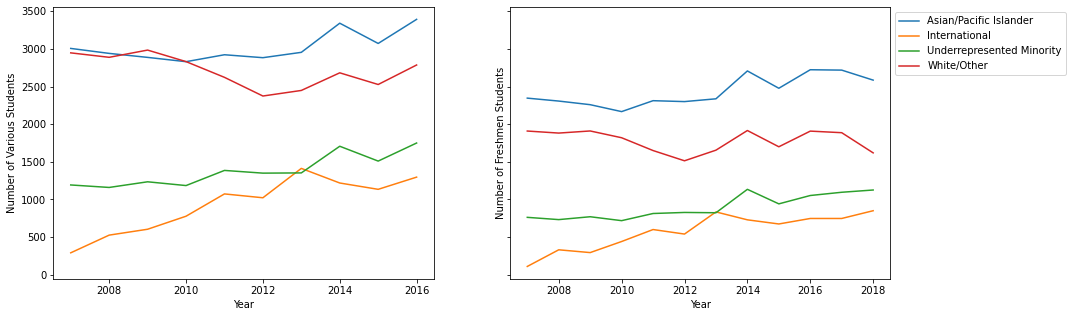

In [8]:
fig, ax = plt.subplots(1, 2, sharex = False, sharey = True, figsize=(15,5))
# STEM Pathways 2007 - 2017

ax[0].plot(data2017.index, 'Asian/Pacific Islander', data=data2017, label='Asian/Pacific Islander')
ax[0].plot(data2017.index, 'International', data=data2017, label='International')
ax[0].plot(data2017.index, 'Underrepresented Minority', data=data2017, label='Underrepresented Minority')
ax[0].plot(data2017.index, 'White/Other', data=data2017, label='White/Other')

# STEM Pathways 2007 - 2018
ax[1].plot(data2018.index, 'Asian/Pacific Islander', data=data2018, label='Asian/Pacific Islander')
ax[1].plot(data2018.index, 'International', data=data2018, label='International')
ax[1].plot(data2018.index, 'Underrepresented Minority', data=data2018, label='Underrepresented Minority')
ax[1].plot(data2018.index, 'White/Other', data=data2018, label='White/Other')

ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[0].set_xlabel("Year")
ax[0].set_ylabel('Number of Various Students')
ax[1].set_xlabel("Year")
ax[1].set_ylabel('Number of Freshmen Students');